In [2]:
# 1. Download data.zip from the celebrity faces dataset from kaggle at 
# https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset/data

# Important OpenCV face detection and classification links
# https://realpython.com/blog/python/face-recognition-with-python/
# https://www.superdatascience.com/opencv-face-detection/
# https://www.superdatascience.com/opencv-face-recognition/

In [35]:
#Load all necessary libraries
import numpy as np
import cv2 # opencv
import os # control and access the directory structure in local machine
from matplotlib import pyplot as plt
import time


In [10]:
os.chdir('C:/Users/rithanya/Documents/Python/faces/') #folder where I unzipped data.zip

#OpenCV cascades (xml files) are typically stored at this location
#C:\Users\<user>\Miniconda3\Library\etc\haarcascades
haarcascades_path = os.listdir('C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/')
frontface_alt_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt.xml'
frontface_default_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_default.xml'
frontface_alt2_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'
frontface_alt_tree_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'


In [8]:
#utility function to apply differenct cascade function on the images at difference scaleFactor
def detect(faceCascade, gray_,  scaleFactor_ = 1.1):
    faces = faceCascade.detectMultiScale(
                    gray_,
                    scaleFactor= scaleFactor_,
                    minNeighbors=5,
                    minSize=(30, 30),
                    flags = cv2.CASCADE_SCALE_IMAGE
                )
    return faces

In [40]:
# code that iterates thru the images in the celebrityfaces dataset and detects faces. Finally it
# ... only displays those images that it can't detect the faces.
faceCascade_default = cv2.CascadeClassifier(frontface_default_cascade)
faceCascade_alt = cv2.CascadeClassifier(frontface_alt_cascade)
faceCascade_alt2 = cv2.CascadeClassifier(frontface_alt2_cascade)
faceCascade_alt_tree = cv2.CascadeClassifier(frontface_alt_tree_cascade)
i = 0
t1 = time.time()
for imgfolder in os.listdir('train/'): #iterate thru each of the 5 celeb folders
    if(imgfolder != '.DS_Store'):
        for filename in os.listdir('train/' + imgfolder):# iterate thru each image in a celeb folder
            filename = 'train/' + imgfolder + '/' + filename # build the path to the image file
            if(filename.endswith('.jpg')):
                #print(filename) # print the filename read. For debugging purpose only
                img = cv2.imread(filename) # read the image using OpenCV
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = detect(faceCascade_default, gray, 1.1)
                if (len(faces)!=1):
                    faces = detect(faceCascade_default, gray, 1.2)
                    if(len(faces) != 1):
                        faces = detect(faceCascade_alt2,gray, 1.1)
                        if(len(faces) != 1):
                            faces = detect(faceCascade_alt2,gray, 1.2)
                            if(len(faces) != 1):
                                faces = detect(faceCascade_alt, gray, 1.1)
                                if(len(faces) != 1):
                                    faces = detect(faceCascade_alt, gray, 1.2)
                                    if(len(faces) != 1):
                                        faces = detect(faceCascade_alt_tree, gray, 1.1)
                                        if(len(faces) != 1):
                                            faces = detect(faceCascade_alt_tree, gray, 1.2)
                                            if(len(faces) != 1):
                                                i = i + 1
                                                continue
                                                for (x, y, w, h) in faces:
                                                    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                                                plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # display all images read
                                                print(filename) # print the filename read. For debugging purpose only
                                                plt.xticks([]), plt.yticks([])
                                                plt.show()
                                                

t2 = time.time()
print ('Time taken %f seconds' %  round((t2 - t1),2))
print(i)

Time taken 3.510000 seconds
9


In [ ]:
# TODO 
# 1. use the LBP cascade files to detect faces. How many faces can this detect. How much faster is
#     ... it compared to Haar. 
# 2. We need to crop the faces from detected images and save them. This can be used as training data
#     ... set for the next phase recognizer
# 3. Review the SuperDataScience.com articles on Face recognition and apply different OpenCV face
#    ... recognizers (Eigenfaces, FisherFaces, LBPH etc.,) on this dataset. See what works better
# 4. Learn how to draw the label of the recognized faces using OpenCV (just above the rectangle)
# 5. Learn how to extract frames from a video file and run this pipleline to detect and recognize faces


In [13]:
lbpcascadesPath = os.listdir("C:/Users/rithanya/Miniconda3/Library/etc/lbpcascades/")

lbp_frontface_path = "C:/Users/rithanya/Miniconda3/Library/etc/lbpcascades/lbpcascade_frontalface.xml"
lbp_fronface_improved_path = "C:/Users/rithanya/Miniconda3/Library/etc/lbpcascades/lbpcascade_frontalface_improved.xml"
lbp_frontface_profile_path = "C:/Users/rithanya/Miniconda3/Library/etc/lbpcascades/lbpcascade_profileface.xml"

In [14]:
# code that iterates thru the images in the celebrityfaces dataset and detects faces. Finally it
# ... only displays those images that it can't detect the faces.
lbp_frontfaceCascade = cv2.CascadeClassifier(lbp_frontface_path)
lbp_fronfaceimprovedCascade = cv2.CascadeClassifier(lbp_fronface_improved_path)
lbp_profileCascade = cv2.CascadeClassifier(lbp_frontface_profile_path)



In [38]:

i = 0
t1 = time.time()

for imgfolder in os.listdir('train/'): #iterate thru each of the 5 celeb folders
    if(imgfolder != '.DS_Store'):
        for filename in os.listdir('train/' + imgfolder):# iterate thru each image in a celeb folder
            filename = 'train/' + imgfolder + '/' + filename # build the path to the image file
            if(filename.endswith('.jpg')):
                #print(filename) # print the filename read. For debugging purpose only
                img = cv2.imread(filename) # read the image using OpenCV
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = detect(lbp_frontfaceCascade, gray, 1.1)
                if(len(faces) != 1):
                    faces = detect(lbp_frontfaceCascade, gray, 1.2)
                    if(len(faces) != 1):
                        faces = detect(lbp_fronfaceimprovedCascade, gray, 1.1)
                        if(len(faces) != 1):
                            faces = detect(lbp_fronfaceimprovedCascade, gray, 1.2)
                            if(len(faces) != 1):
                                faces = detect(lbp_profileCascade, gray, 1.1)
                                if(len(faces) != 1):
                                    faces = detect(lbp_profileCascade, gray, 1.2)
                                    if(len(faces) != 1):
                                        i = i +1
                                        continue
                                        for (x, y, w, h) in faces:
                                            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                                        plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # display all images read
                                        print(filename) # print the filename read. For debugging purpose only
                                        plt.xticks([]), plt.yticks([])
                                        plt.show()
                    
t2 = time.time()
print ('Time taken %f seconds' %  np.round((t2 - t1),2))
print(i)

Time taken 1.460000 seconds
16


In [51]:
#function to detect face using OpenCV
def detect_face(img, face_cascade):
    #convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow: Haar classifier
    #face_cascade = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')

    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);

    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None

    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]

    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [117]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
#of faces and another list of labels for each face
def prepare_training_data():
    
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    label_names = ['']
    lbp_frontfaceCascade = cv2.CascadeClassifier(lbp_frontface_path)
    faceCascade_default = cv2.CascadeClassifier(frontface_default_cascade)
    detected_images = []
    for imgfolder in os.listdir('train/'): #iterate thru each of the 5 celeb folders
        if(imgfolder != '.DS_Store'):
            label_names.append(imgfolder)
            for filename in os.listdir('train/' + imgfolder):# iterate thru each image in a celeb folder
                filename = 'train/' + imgfolder + '/' + filename # build the path to the image file
                if(filename.endswith('.jpg')):
                    img = cv2.imread(filename) # read the image using OpenCV
                    #detect face
                    face, rect = detect_face(img, faceCascade_default) # lbp_frontfaceCascade)

                    #------STEP-4--------
                    #for the purpose of this tutorial
                    #we will ignore faces that are not detected
                    if face is not None:
                        #add face to list of faces
                        faces.append(face)
                        #add label for this face
                        labels.append(label_names.index(imgfolder))
                        detected_images.append(filename)
                        continue
                        plt.imshow(face, cmap = 'gray', interpolation = 'bicubic') # display all images read
                        plt.xticks([]), plt.yticks([])
                        plt.show()

                        

    return faces, labels, detected_images, label_names

In [118]:
#let's first prepare our training data
#data will be in two lists of same size
#one list will contain all the faces
#and the other list will contain respective labels for each face
print("Preparing data...")
faces, labels, detectedimages, label_names = prepare_training_data()
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))
print(detectedimages[0])
#print(labels)

Preparing data...
Data prepared
Total faces:  80
Total labels:  80
train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg


In [68]:
#create our LBPH face recognizer 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createEigenFaceRecognizer()

#or use FisherFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createFisherFaceRecognizer()

In [69]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(labels))

In [74]:
#function to draw rectangle on image 
#according to given (x, y) coordinates and 
#given width and heigh
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
     cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [119]:
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the 
#subject
def predict(test_img):
    #make a copy of the image as we don't want to change original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img, faceCascade_default) #lbp_frontfaceCascade)
    if(face is not None):
        #predict the image using our face recognizer 
        label= face_recognizer.predict(face)
        #get name of respective label returned by face recognizer
        #print(label[0])
        label_text = label_names[label[0]]

        #draw a rectangle around face detected
        draw_rectangle(img, rect)
        #draw name of predicted person
        draw_text(img, label_text, rect[0], rect[1]-5)

        return img, label_text
    else:
        return None, None

Predicting images...


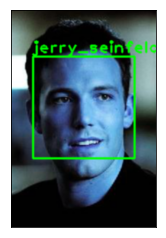

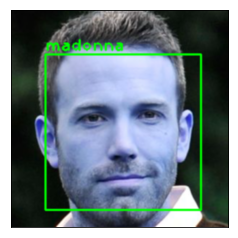

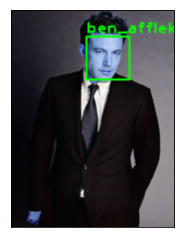

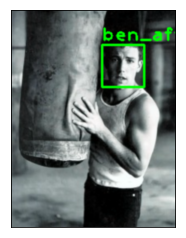

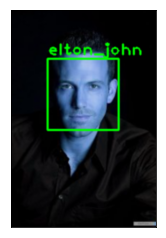

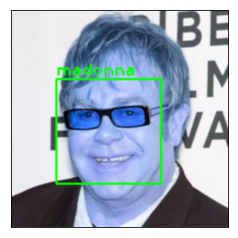

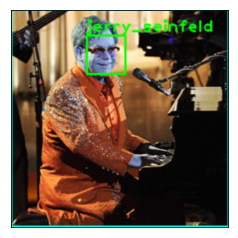

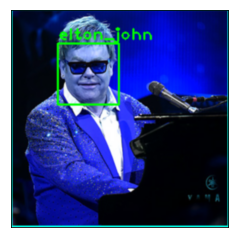

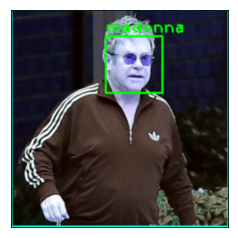

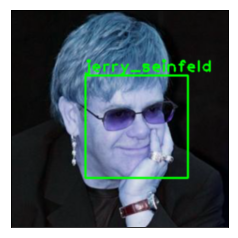

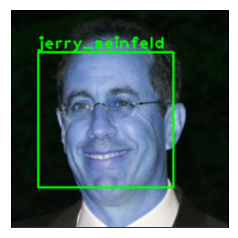

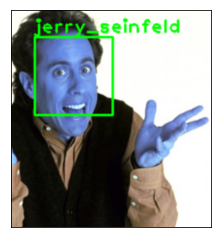

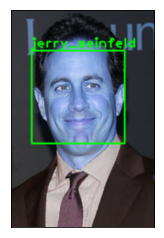

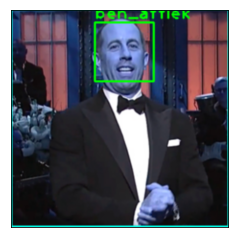

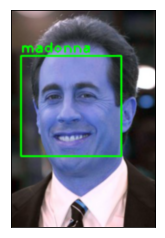

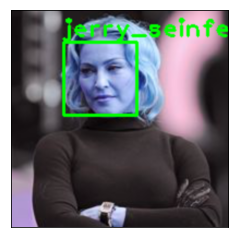

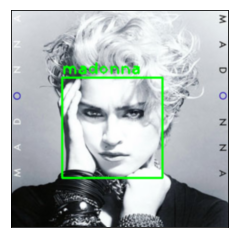

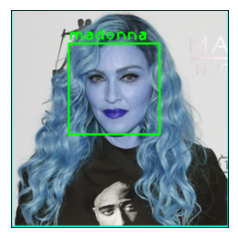

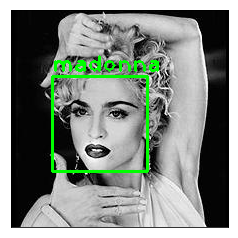

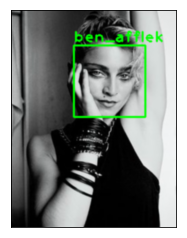

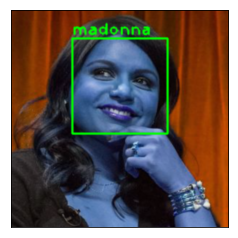

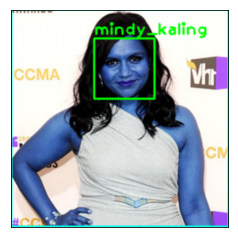

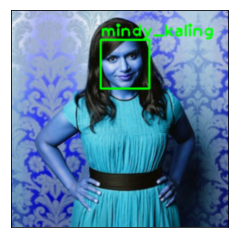

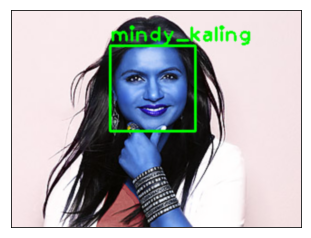

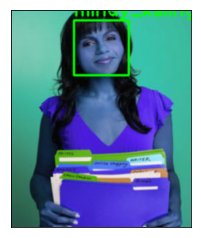

Prediction complete


In [120]:
print("Predicting images...")
test_labels = []
pred_labels = []
for imgfolder in os.listdir('val/'): #iterate thru each of the 5 celeb folders
    for filename in os.listdir('val/' + imgfolder):# iterate thru each image in a celeb folder
        if(filename.endswith('.jpg')):
            file_ = 'val/' + imgfolder + '/' + filename # build the path to the image file
            #for file_ in detectedimages:
            #perform a prediction
            img = cv2.imread(file_)
            predicted_img1, pred_label = predict(img)
            if(predicted_img1 is not None):
                test_labels.append(imgfolder)
                pred_labels.append(pred_label)
                plt.imshow(predicted_img1, cmap = 'gray', interpolation = 'bicubic') # display all images read
                plt.xticks([]), plt.yticks([])
                plt.show()
            else:
                print("Prediction failed for %s" %file_)
print("Prediction complete")



In [121]:
print(len(test_labels))
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels)

25


0.52000000000000002

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)

array([[2, 1, 1, 1, 0],
       [0, 1, 2, 2, 0],
       [1, 0, 3, 1, 0],
       [1, 0, 1, 3, 0],
       [0, 0, 0, 1, 4]], dtype=int64)

In [ ]:
#TODO
# 1. Use different combination of the cascades (both Haar and Lbp with different scale factor) to see
# ... if we can increase the detection accuracy i.e detect faces in more images in both training 
# ... validation set

# 2. Use different combination of Recognizers (Eigenfaces, Fisherfaces and Lbphfaces) to see if we can
# ... improve the classification accuracy

# 3. Review data to see what causes some of the missed detection and incorrect recognition? Can we manually 
# ... do some kind of image transformation to imporve it. 

# 4. For detection can we build a validation curve for each of the Cascades? The cascades have different
#... values for precision and recall. Can we find the cascade or ensemble of cascades that works well
#... in out dataset? Also which cascade gives the best bang for the CPU power even if the accuracy 
# ... is low.

# 5. In the recognition. Is the lower accuracy due to underfitting? How does the learning curve look
# ... like for each of the recognizers? Will a bigger data set improve the fit. Will an ensemble of
# ... recognizers improve the fit? 

#6. Which cascade (detector) generalizes well across different dataset? Shall we apply it on the 
#  ... employee dataset?